[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
Index: 61691 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           61691 non-null  int64 
 1   Borderlands  61691 non-null  object
 2   Label        61691 non-null  object
 3   Content      61120 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 61120 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           61120 non-null  int64 
 1   Borderlands  61120 non-null  object
 2   Label        61120 non-null  object
 3   Content      61120 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88      6786
     Neutral       0.89      0.82      0.85      5308
    Positive       0.83      0.89      

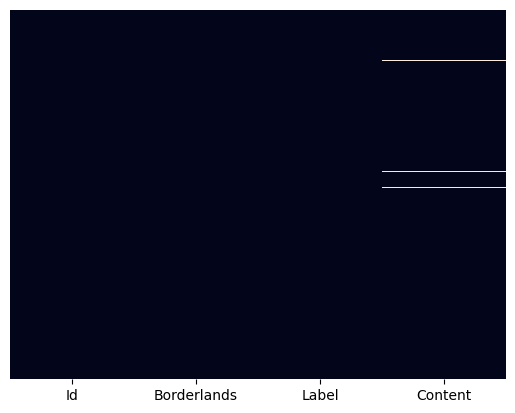

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')

df = pd.read_csv('twitter_training.csv/twitter_training.csv')
df.head()

df.rename(columns={'Positive':'Label','im getting on borderlands and i will murder you all ,':'Content','2401':'Id'},inplace=True)

df = df[df['Label'] != 'Irrelevant']

df.info()

df['Label'].describe()

sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

df.dropna(axis=0,inplace=True)

df.info()
df.head()

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score

cv = CountVectorizer()

X = df['Content']
y = df['Label']

X = cv.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(max_iter=1000)

lg.fit(X_train, y_train)

pred1 = lg.predict(X_test)

print(classification_report(y_test, pred1))
print(accuracy_score(y_test, pred1))

def predict_sentiment(message):
    message_vec = cv.transform([message])
    
    prediction = lg.predict(message_vec)
    
    return prediction[0]